In [1]:
import random
from collections import namedtuple
import numpy as np

In [2]:
win = [0.9, 0.8, 0.7] #actual parameter unknow to us
NUM_EPOCH = 10000
param = namedtuple('param', ['alpha', 'beta'])
models_parameter = [param(1, 1), param(1, 1), param(1, 1)]

actions_probability = []

In [3]:
for epoch in range(NUM_EPOCH):
    sampel = []
    for alpha, beta in models_parameter:
        theta = random.betavariate(alpha, beta)
        sampel.append(theta)

    idx = np.argmax(sampel)

    rt = random.random()
    award = 0
    if rt > 1 - win[idx]: #the reward follow from actual distribution 
        award = 1

    new_param = param(models_parameter[idx].alpha + award, models_parameter[idx].beta + (1 - award))
    models_parameter[idx] = new_param
    actions_probability.append([a/(a+b) for a, b in models_parameter])

In [4]:
[a/(a+b) for a, b in models_parameter]

[0.8989817521927613, 0.7321428571428571, 0.6451612903225806]

In [5]:
models_parameter

[param(alpha=8917, beta=1002),
 param(alpha=41, beta=15),
 param(alpha=20, beta=11)]

In [6]:
actions_probability = np.array(actions_probability).transpose()

In [7]:
print(actions_probability)

[[0.5        0.5        0.5        ... 0.89896138 0.89897157 0.89898175]
 [0.66666667 0.75       0.6        ... 0.73214286 0.73214286 0.73214286]
 [0.5        0.5        0.5        ... 0.64516129 0.64516129 0.64516129]]


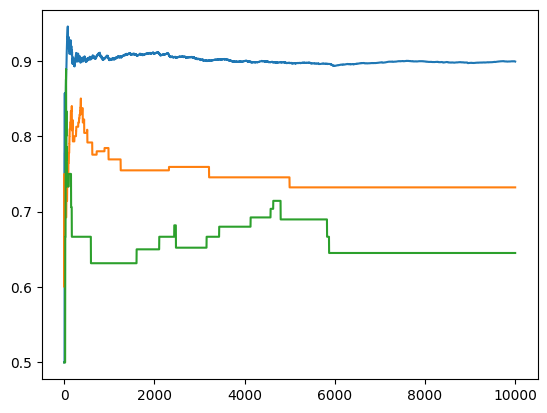

In [8]:
import matplotlib.pyplot as plt
plt.plot(actions_probability[0], )
plt.plot(actions_probability[1])
plt.plot(actions_probability[2])
plt.show()